# Housing market predictions

The real estate markets present an interesting opportunity for data scientists to analyze and predict the behaviour and trends of property prices.

In this project I focus on implementing a few advanced regression models to predict housing prices based on various property and location characteristics (publicly available dataset from Kaggle).

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-1.-Data-exploration-and-cleaning-" data-toc-modified-id="-1.-Data-exploration-and-cleaning--1"><span style="color: steelblue"> 1. Data exploration and cleaning </span></a></span></li><li><span><a href="#-2.-Data-visualization-" data-toc-modified-id="-2.-Data-visualization--2"><span style="color: steelblue"> 2. Data visualization </span></a></span></li><li><span><a href="#-3.-Data-preparation-" data-toc-modified-id="-3.-Data-preparation--3"><span style="color: steelblue"> 3. Data preparation </span></a></span></li><li><span><a href="#-4.-Model-fitting-" data-toc-modified-id="-4.-Model-fitting--4"><span style="color: steelblue"> 4. Model fitting </span></a></span></li><li><span><a href="#-5.-Discussion-and-conclusions-" data-toc-modified-id="-5.-Discussion-and-conclusions--5"><span style="color: steelblue"> 5. Discussion and conclusions </span></a></span></li></ul></div>

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso 
from sklearn.linear_model import BayesianRidge 
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.metrics import r2_score as r2 
from tabulate import tabulate
from sklearn.model_selection import GridSearchCV
from numpy import arange
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## <span style='color:steelblue'> 1. Data exploration and cleaning </span>

In [16]:
housing = pd.read_csv("data.csv")

In [44]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [45]:
housing.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [46]:
print(housing.isnull().sum())

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


**Dataset description**
&nbsp;

The data set consists of 4600 rows of 18 columns comprising various property characteristics related to their size, room and distribution attributes and city (from the state of Washington, U.S.). There are no null values. 

Since the location related columns (except 'city' and 'street') and the 'date' column are homogenous and thus irrelevant for analysis they were eliminated using the code below. Also the 'price' column was rounded.

In [17]:
# Unnecesary columns elimination

housing = housing.loc[:, housing.columns != 'country']
housing = housing.loc[:, housing.columns != 'date']

In [18]:
# Round the price column

housing['price'] = housing['price'].round(decimals=2)

## <span style='color:steelblue'> 2. Data visualization </span>

The price distribution plot below shows that most houses are in the range of 250 thousand dollars to one million, with a median of around 460 thousand dollars.

In [266]:
round(housing.price.median())

460943

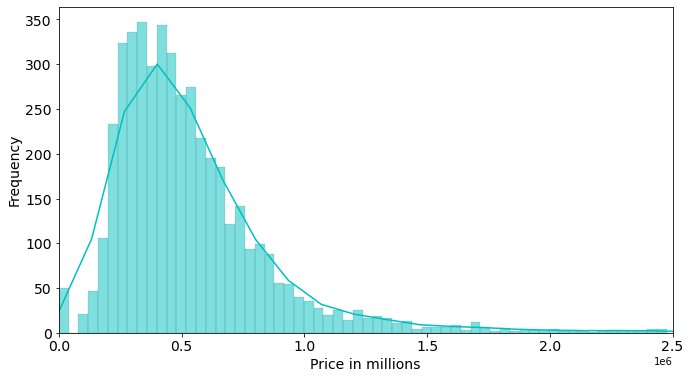

In [298]:
# Housing prices distribution

plt.figure(figsize = (11,6))

sns.histplot(housing['price'], color = "c", kde=True)
plt.xlabel('Price in millions', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlim(0, 2500000)

plt.show()

In [291]:
housing.city.value_counts()[:10] # top housing market cities 

Seattle        1573
Renton          293
Bellevue        286
Redmond         235
Issaquah        187
Kirkland        187
Kent            185
Auburn          176
Sammamish       175
Federal Way     148
Name: city, dtype: int64

In [299]:
# Creating data frame for violin plot 
cities = ('Seattle', 'Renton', 'Bellevue', 
          'Redmond', 'Issaquah', 'Kirkland', 
          'Kent', 'Auburn', 'Sammamish', 'Federal Way')
housing.city.isin(cities)
top_cities = housing[housing.city.isin(cities)]

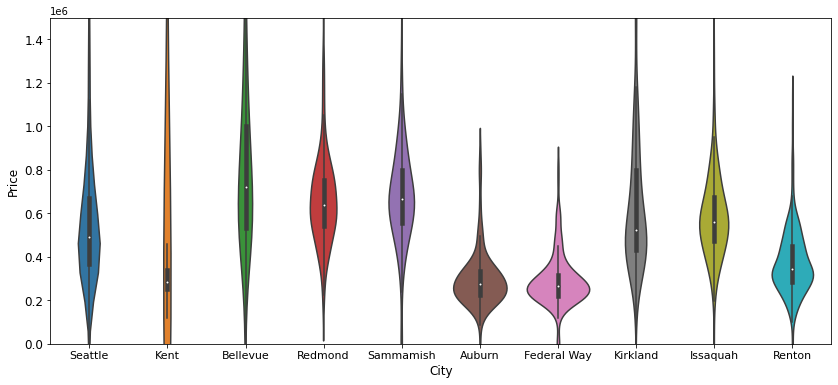

In [321]:
plt.figure(figsize=(14, 6))

ax = sns.violinplot(data=top_cities, x='city', y='price')
ax.set_ylim(bottom=0, top=1500000)
ax.set_xlabel("City",  fontsize = 12)
ax.set_ylabel("Price",  fontsize = 12)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 12)

plt.show()

&nbsp;

The plot above shows that there is considerable price viariability by city. This may be true also for different streets and postal codes so I decided to leave those object variables for analysis (later enconded/transformed into dummy variables). 

&nbsp;

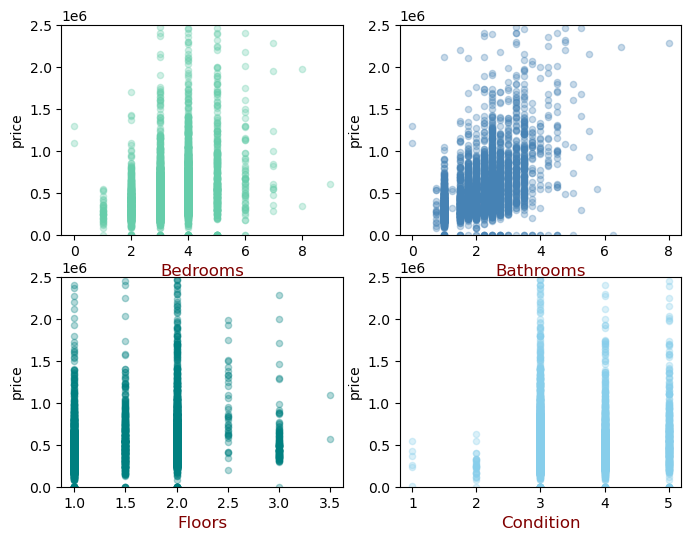

In [259]:
# Scatterplots of housing rooms, floors and condition

plt.style.use('default')
fig, ax = plt.subplots(2, 2, figsize = (8, 6)) 

housing.plot(kind='scatter', x='bedrooms', y='price', color='mediumaquamarine', alpha=0.3, ylim=(0,2500000), ax=ax[0,0])
housing.plot(kind='scatter', x='bathrooms', y='price', color='steelblue', alpha=0.3, ylim=(0,2500000), ax=ax[0,1])
housing.plot(kind='scatter', x='floors', y='price', color='teal', alpha=0.3, ylim=(0,2500000), ax=ax[1,0])
housing.plot(kind='scatter', x='condition', y='price', color='skyblue', alpha=0.3, ylim=(0,2500000), ax=ax[1,1])

ax[0,0].set_xlabel('Bedrooms', size=12, color='maroon')
ax[0,1].set_xlabel('Bathrooms', size=12, color='maroon')
ax[1,0].set_xlabel('Floors', size=12, color='maroon')
ax[1,1].set_xlabel('Condition', size=12, color='maroon')

plt.show()

&nbsp;

As observed in the plots above, the house condition, number of bathrooms and number of bedrooms in general show a positive correlation with price. The relation between number of floors and the house price is not entirely clear.

&nbsp;

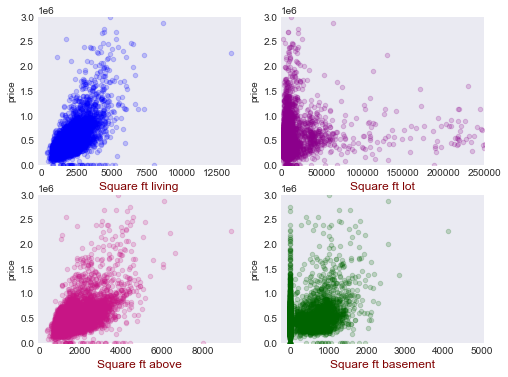

In [322]:
# Scatterplots of house square feet variables (size)
plt.style.use('seaborn-dark')
fig, ax = plt.subplots(2, 2, figsize = (8, 6)) 

housing.plot(kind='scatter', x='sqft_living', y='price', color='blue', alpha=0.2, ylim=(0,3000000), ax=ax[0,0])
housing.plot(kind='scatter', x='sqft_lot', y='price', color='darkmagenta', alpha=0.2, xlim=(0,250000), ylim=(0,3000000), ax=ax[0,1])
housing.plot(kind='scatter', x='sqft_above', y='price', color='mediumvioletred', alpha=0.2, ylim=(0,3000000), ax=ax[1,0])
housing.plot(kind='scatter', x='sqft_basement', y='price', color='darkgreen', alpha=0.2, ylim=(0,3000000), ax=ax[1,1])

ax[0,0].set_xlabel('Square ft living', size=12, color='maroon')
ax[0,1].set_xlabel('Square ft lot', size=12, color='maroon')
ax[0,1].set_xticks((0,250000, 50000, 100000, 150000,200000))
ax[1,0].set_xlabel('Square ft above', size=12, color='maroon')
ax[1,1].set_xlabel('Square ft basement', size=12, color='maroon')

plt.show()

&nbsp;

The scatterplots above show that all the variables related to the houses size show somewhat of a positive linear relationship with price. They may be amongst the most important features for price prediction. This will later be elucidated by plotting model's feature importance. 

&nbsp;

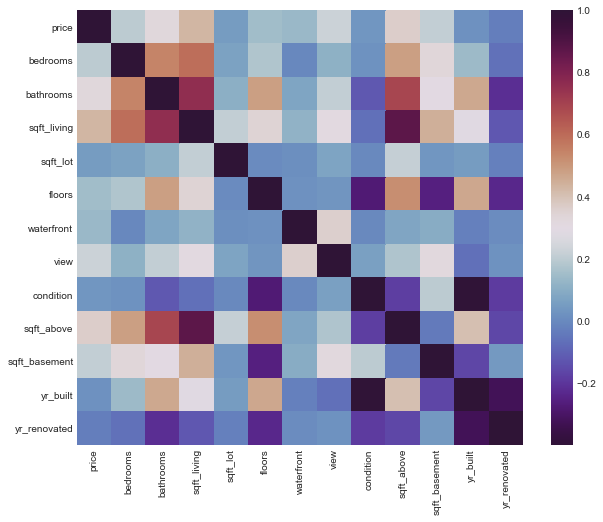

In [349]:
# Correlation heatmap

corr_matrix = housing.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, vmax=1, cmap="twilight_shifted")

plt.show()

&nbsp;

There seems to be few pairs of highly correlated numeric variables, however, they are expected since many characteristics are related to the size and condition of the house so I decided to not remove them.


## <span style='color:steelblue'> 3. Data preparation </span>

All the necessary preprocessing steps for machine learning were followed below. The categorical features were encoded in order to optimize modeling. A matrix of features and dependent variable vector were created. The dataset was split into train and test sets and feature scaling was performed.

In [19]:
# Encoding object variables (city, street, zip code)

for col in housing.columns:
    if housing[col].dtype == 'object':
        encoded = pd.get_dummies(housing[col], drop_first=False)
        encoded = encoded.add_prefix('{}_'.format(col))
        housing.drop(col, axis=1, inplace=True)
        housing = housing.join(encoded)

In [20]:
# Creating the matrix of features and dependent variable vector 

X = housing.loc[:, housing.columns != 'price']
y = housing.loc[:, 'price']

In [21]:
# Data set splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

In [22]:
# Feature scaling / Standardization

sc = StandardScaler()
X_train.iloc[:, :12] = sc.fit_transform(X_train.iloc[:, :12])
X_test.iloc[:, :12] = sc.transform(X_test.iloc[:, :12])

The result of standardization (Z-score) is that the features will be rescaled to ensure the mean and the standard deviation to be 0 and 1, respectively.  Standardization is more robust to outliers than normalization.

## <span style='color:steelblue'> 4. Model fitting </span>

Since Multiple Linear Regression performed poorly, Polynomial Regression was also attempted (in case of non-linearity predominance) but the results were also deficient. So a few other regression models were fit in this analysis:

- Ridge Regression 
- Lasso Regression
- Bayesian Ridge Regression
- Gradient Boosting Regression (sklearn)
- XGB regressor (XGBoost)

The model's evaluation was through the R-squared score ('r2_score' metric function from scikit-learn). R-squared is a statistical measure that represents the proportion of the variance for a dependent variable that is explained by an independent variable or variables. It is the most popular evaluation metric for regression models.


**Note**: Sometimes the practical significance of the R-squared value can be misunderstood. R-squared is a measure of explanatory power, not fit. It indicates that a regression model has statistically significant explanatory power. So it must be considered as an effect size (measure of the strength of the relationship between variables in a statistical population), and thus, often relatively low values are expected.
The ideal ‘r2_score’ of a build should be more than 0.70 or at least higher than 0.60. If the 'r2_score' of a model is 0.50, for example, then approximately half of the observed variation can be explained by the model's inputs.

In [32]:
# Some regression models were cross validated through the following grid search method

alphas = arange(0, 1, 0.01)  # range of alpha values to test
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))  # search grid 
grid.fit(X, y)  # fit

print(grid.best_score_)  # summary of the grid search
print(grid.best_estimator_.alpha)

In [26]:
# Ridge regression

ridge = Ridge(alpha = 0.99) # alpha obtained through cross validation
ridge.fit(X_train, y_train)
ridge_ypred = ridge.predict(X_test)
ridge_r = r2(y_test, ridge_ypred)

In [28]:
# Bayesian ridge regression

bayesian_r = BayesianRidge()
bayesian_r.fit(X_train, y_train)
bayesianr_ypred = bayesian_r.predict(X_test)
bayesianr_r = r2(y_test, bayesianr_ypred)

In [29]:
# Lasso regression

lasso = Lasso(alpha = 0.7)  # alpha obtained through cross validation
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)
lasso_r = r2(y_test, lasso_yhat)

In [51]:
# Gradient boosting regressor

gbr_reg = GradientBoostingRegressor()
gbr_reg.fit(X_train, y_train)
gbr_yhat = gbr_reg.predict(X_test)
gbr_r = r2(y_test, gbr_yhat)

In [52]:
# XGBoost

XGBoost = XGBRegressor(max_depth=7, n_estimators=1000, learning_rate=0.1) # parameter tuning was performed using xgb.cv
XGBoost.fit(X_train,y_train)
XGBoost_yhat = XGBoost.predict(X_test)
XGB_r = r2(y_test, XGBoost_yhat)

In [53]:
# Results table

print(tabulate([['Ridge', ridge_r], ['Bayesian Ridge', bayesianr_r],
                ['Lasso', lasso_r], ['Gradient Boosting', gbr_r],
                ['XGBoost', XGB_r]], headers=['Regression model','R-squared'], tablefmt='orgtbl'))

| Regression model   |   R-squared |
|--------------------+-------------|
| Ridge              |    0.602584 |
| Bayesian Ridge     |    0.603049 |
| Lasso              |    0.460363 |
| Gradient Boosting  |    0.633882 |
| XGBoost            |    0.709033 |


## <span style='color:steelblue'> 5. Discussion and conclusions </span>


* Ridge regression trades away much of the variance (due to multicollinearity) in exchange for a little bias, so it performed relatively well considering there was not that much multicollinearity. 

&nbsp;
* Bayesian ridge regression is also a linear regression model with extra regularization parameters, like ridge regression, only a Bayesian approach equivalent. It very lightly improved the previous result.

&nbsp;

* Lasso regression performs variable selection that aims to increase prediction accuracy with a simpler model. It did worse than the previous 2 models, this method may be more suitable with more extense datasets.

&nbsp;

* Both scikit-learn and XGBoost's functions for gradient boosting regression were used. Gradient Boosting is a machine learning technique which builds an additive model (of weak prediciton models) in a forward stage-wise fashion, it typically uses decision trees. Usually, it even outperforms the Random Forest algorithm. In this case, they both outperformed the previous models.


The XGBoost model outperformed all the other regression models with an R-squared score of 0.709033.

&nbsp;

<Figure size 1008x1008 with 0 Axes>

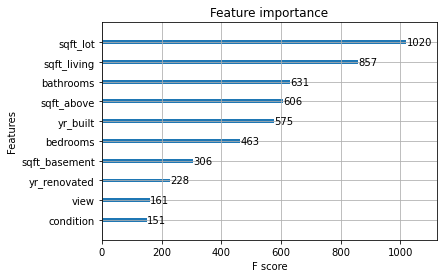

In [49]:
# Feature importance

plt.figure(figsize=(14, 14))
plot_importance(XGBoost, max_num_features=10)

plt.show()

The XGBoost library also contains a function to plot feature importance (above).